In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(-0.5, 265.5, 188.5, -0.5)

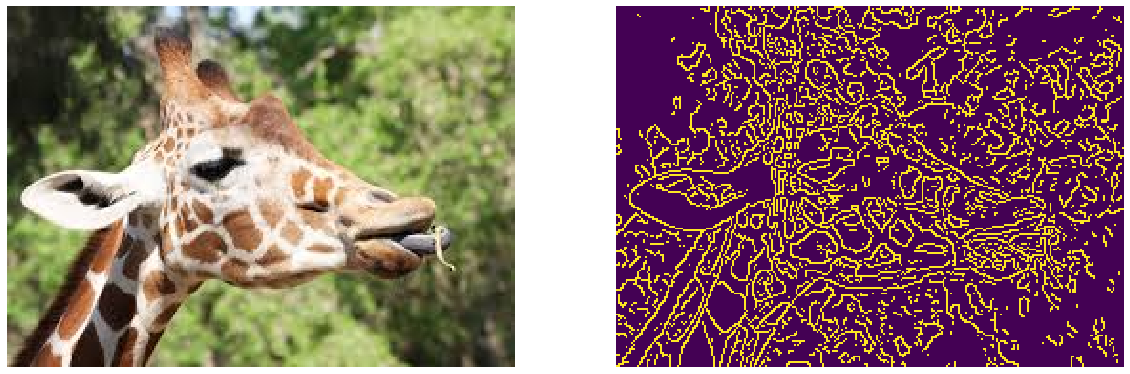

In [2]:
img = cv2.imread('data/giraffe.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Canny 檢測 沒有 模糊
# Canny detection without blurring


edges = cv2.Canny(image=img, threshold1=125, threshold2=125)
plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(edges)
plt.axis('off')

(-0.5, 265.5, 188.5, -0.5)

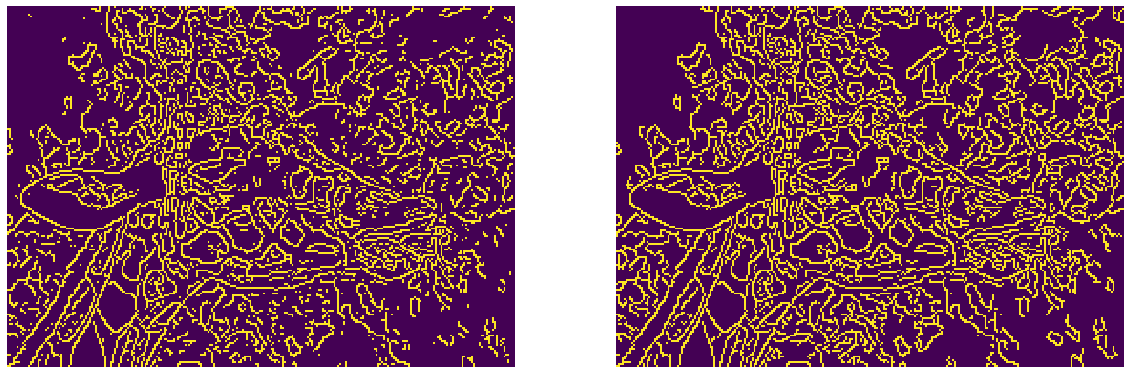

In [9]:
# 設置  閾值 下限 和 上限              
# Set the lower and upper threshold

med_val = np.median(img)
lower = int(max(0, .7*med_val))
upper = int(min(255, 1.3*med_val))

edges_1 = cv2.Canny(image=img, threshold1=lower, threshold2=upper)
plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(edges)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(edges_1)
plt.axis('off')

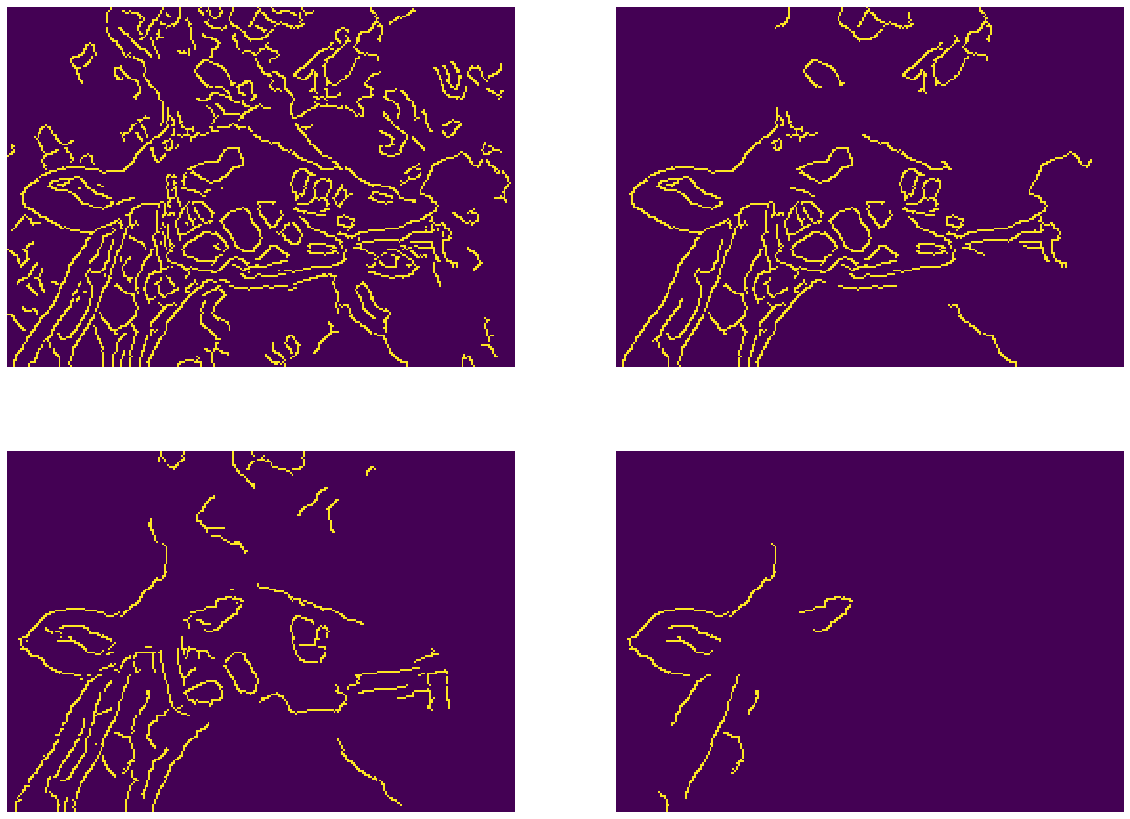

In [5]:
# Blurring with ksize = 5  ksize = 5 進行 模糊處理

img_k5 = cv2.blur(img, ksize = (5, 5)) 

# Canny detection with different thresholds  不同的閾值

edges_k5 = cv2.Canny(img_k5, threshold1 = lower, threshold2 = upper)

edges_k5_2 = cv2.Canny(img_k5, lower, upper+100)

# Blurring with ksize = 9 模糊處理

img_k9 = cv2.blur(img, ksize = (9, 9))

# Canny detection with different thresholds 不同的閾值

edges_k9 = cv2.Canny(img_k9, lower, upper)
edges_k9_2 = cv2.Canny(img_k9, lower, upper+100)

# Plot the images 繪製圖像
images = [edges_k5, edges_k5_2, edges_k9, edges_k9_2]
plt.figure(figsize = (20, 15))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

<img src="https://miro.medium.com/max/875/1*M7v6-iD-P26Mc_4fOwBd8w.png" width="100%"> 

(-0.5, 298.5, 167.5, -0.5)

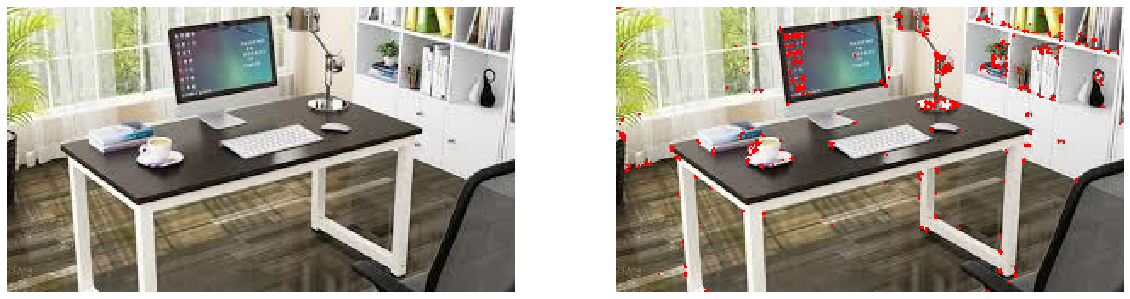

In [11]:
img = cv2.imread('data/desk.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Apply Harris corner detection 哈里斯 角落 檢測

dst = cv2.cornerHarris(img_gray, blockSize = 2, ksize = 3, k = .04)

# 找尋檢 測到 的角落 Corner
# Spot the detected corners

img_2 = img.copy()
img_2[dst>0.01*dst.max()]=[255,0,0]


# Plot the image 繪製圖像

plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(img_2)
plt.axis('off')

(-0.5, 298.5, 167.5, -0.5)

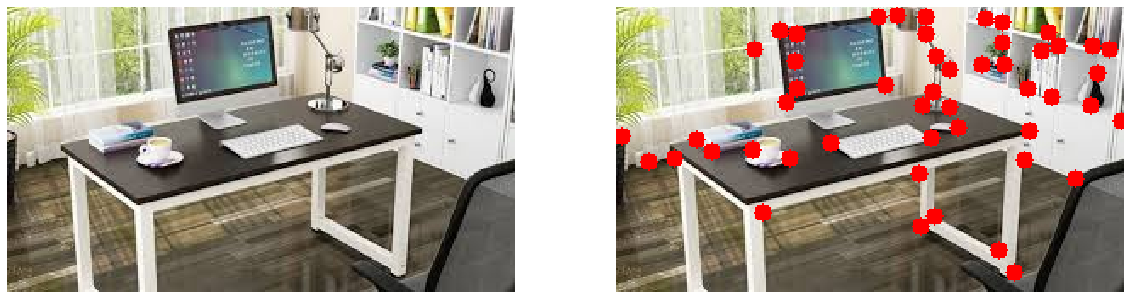

In [13]:
# Shi-Tomasi 角點 檢測
# Apply Shi-Tomasi corner detection

corners = cv2.goodFeaturesToTrack(img_gray, maxCorners = 50, 
                                  qualityLevel = 0.01, 
                                  minDistance = 10)
corners = np.int0(corners)

#  尋找 檢測 到的 角落 corners
# Spot the detected corners

img_2 = img.copy()
for i in corners:
    x,y = i.ravel()
    cv2.circle(img_2, center = (x, y), 
               radius = 5, color = 255, thickness = -1)
# 繪製 圖像
# Plot  the image
plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1); plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(img_2)
plt.axis('off')

In [14]:
# 創建haar級聯
# Create the haar cascade

cascPath = 'haarcascades/haarcascade_frontalface_alt.xml'

# 創建 haarcascade_frontalface_default.xml 路徑

# cascPath = 'detect/haarcascade_frontalface_default.xml'

faceCascade = cv2.CascadeClassifier(cascPath)

In [17]:
def detect_faces_show(fpath):
    img = cv2.imread(fpath)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # 檢測圖像中的面部
    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.2,
        minNeighbors=5,
        minSize=(30, 30),
        flags = cv2.CASCADE_SCALE_IMAGE
    )
    print("Found %d faces!" % len(faces))

    # 臉部 周圍畫 一個矩形
    # Draw a rectangle around the faces
    
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 4)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Found 1 faces!


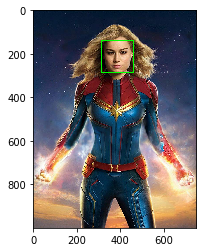

In [18]:
detect_faces_show('data/captin_marvel.jpg')

Found 3 faces!


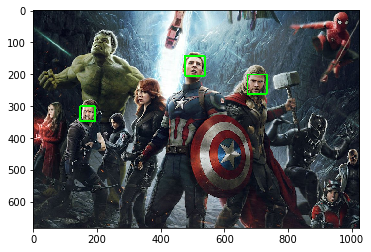

In [19]:
detect_faces_show('data/avengers.jpg')

In [22]:
import cv2
import numpy as np

# Step 1. Define detect function
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

def detect_face(img):
    
    img_copy = img.copy()
    face_rects = face_cascade.detectMultiScale(img_copy)
    
    for (x, y, w, h) in face_rects:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 255, 255), 3)
        
    return img_copy

# Step 2. Call the cam
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()

---
### Reference
Please see the following official tutorials for more detailed explanation.
 - [Basic Operations on Images — OpenCV documentation](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_core/py_basic_ops/py_basic_ops.html)
 - [Drawing Functions in OpenCV — OpenCV documentation](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_drawing_functions/py_drawing_functions.html)

---
### 進階閱讀
- [简单人脸识别一之使用opencv+cnn网络实现人脸识别](https://zhuanlan.zhihu.com/p/69127267)

- [贾志刚-OpenCV学堂](https://cloud.tencent.com/developer/column/2289)